In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/emi_com.csv')

# Filter out rows where 'Emission per Consumption' column has 'inf' values
df_filtered = df[df['Emission per Consumption'] != float('inf')]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('/content/filtered_emi_com.csv', index=False)


In [ ]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = '/content/AllStateGHGDataPY2023_100323.xlsx'

# Specify the output CSV file path
csv_file_path = '/content/state_emissions.csv'

# Load the specific sheet of the Excel file
df = pd.read_excel(excel_file_path, sheet_name='Data by Econ Sect')

# List of columns to drop
columns_to_drop = ['SUBCATEGORY1', 'SUBCATEGORY2', 'SUBCATEGORY3', 'SUBCATEGORY4', 'ROWNUMBER']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
df.to_csv(csv_file_path, index=False)

print(f'The updated data has been saved as a new CSV file at {csv_file_path}')


The updated data has been saved as a new CSV file at /content/state_emissions.csv


In [ ]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/content/state_emissions.csv'

# Load the CSV file into a DataFrame
emissions_df = pd.read_csv(csv_file_path)

# Filter the DataFrame to keep only the rows where the 'GHG' column is 'CO2'
co2_emissions_df = emissions_df[emissions_df['GHG'] == 'CO2']

# Specify the path for the new CSV file
new_csv_file_path = '/content/CO2_state_emissions.csv'

# Save the filtered DataFrame to a new CSV file
co2_emissions_df.to_csv(new_csv_file_path, index=False)

print(f'Filtered CSV file saved as: {new_csv_file_path}')


Filtered CSV file saved as: /content/CO2_state_emissions.csv


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = '/content/CO2_state_emissions.csv'
emissions_df = pd.read_csv(csv_file_path)

# Keep only the specified columns
columns_to_keep = ['STATE', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
                   'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002',
                   'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
                   'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016',
                   'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
emissions_df = emissions_df[columns_to_keep]

# Aggregate the data by 'STATE' and sum the values for all the years
aggregated_df = emissions_df.groupby('STATE').sum().reset_index()

# Specify the path for the new CSV file
new_csv_file_path = '/content/filtered_state_emissions.csv'

# Save the aggregated DataFrame to a new CSV file
aggregated_df.to_csv(new_csv_file_path, index=False)

print(f'Aggregated CSV file saved as: {new_csv_file_path}')


Aggregated CSV file saved as: /content/filtered_state_emissions.csv


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = '/content/filtered_state_emissions.csv'
emissions_df = pd.read_csv(csv_file_path)

# List of valid state abbreviations from your mapping
valid_states = list(state_mapping.keys())

# Filter the DataFrame to keep only rows with a valid state abbreviation in the 'STATE' column
filtered_df = emissions_df[emissions_df['STATE'].isin(valid_states)]

# Specify the path for the new, filtered CSV file
filtered_csv_file_path = '/content/clean_state_emissions.csv'

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(filtered_csv_file_path, index=False)

print(f'Filtered CSV file saved as: {filtered_csv_file_path}')


Filtered CSV file saved as: /content/clean_state_emissions.csv


Index(['id', 'name', 'density', 'geometry'], dtype='object')


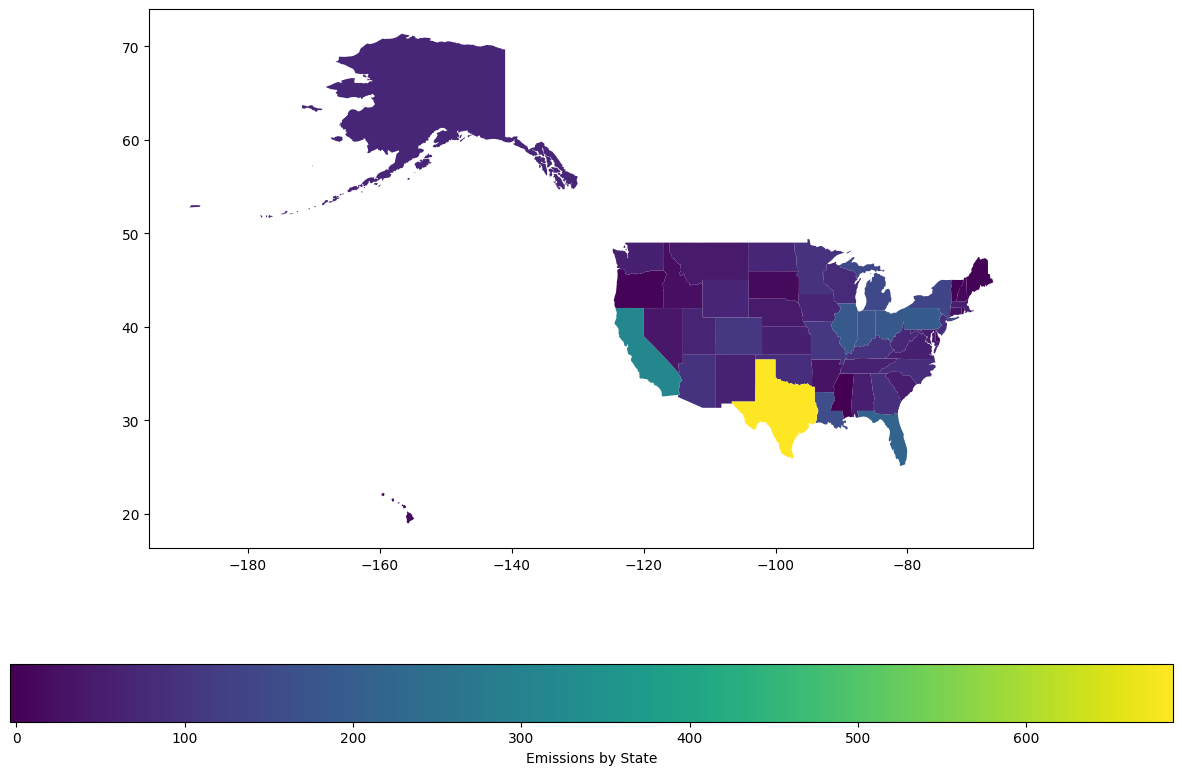

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
#The units in this consolidated file are million metric tons of CO2 equivalents or CO2e.
#Emissions from sources of GHGs are shown with positive numbers; removals from sinks are denoted by negative numbers.

# Load emissions data
emissions_df = pd.read_csv('/content/clean_state_emissions.csv')

state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Load geographical data
geo_df = gpd.read_file('/content/us-states.json')

# Check the column names to identify the key for state names
print(geo_df.columns)

# It appears the 'name' column is correct as per your output
# Rename the 'name' column in geo_df to 'State' for consistency
geo_df.rename(columns={'name': 'STATE'}, inplace=True)

# Load emissions data and apply state mapping to map state abbreviations to full names
emissions_df = pd.read_csv('/content/clean_state_emissions.csv')
emissions_df['STATE'] = emissions_df['STATE'].map(state_mapping)

# Merge the emissions data with the geographical data using the common 'State' column
# Ensure that both DataFrames have a 'State' column after the renaming
map_df = geo_df.merge(emissions_df, on='STATE')

# Plotting the heat map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_df.plot(column='Y2019', ax=ax, legend=True,
            legend_kwds={'label': "Emissions by State",
                         'orientation': "horizontal"})
plt.show()


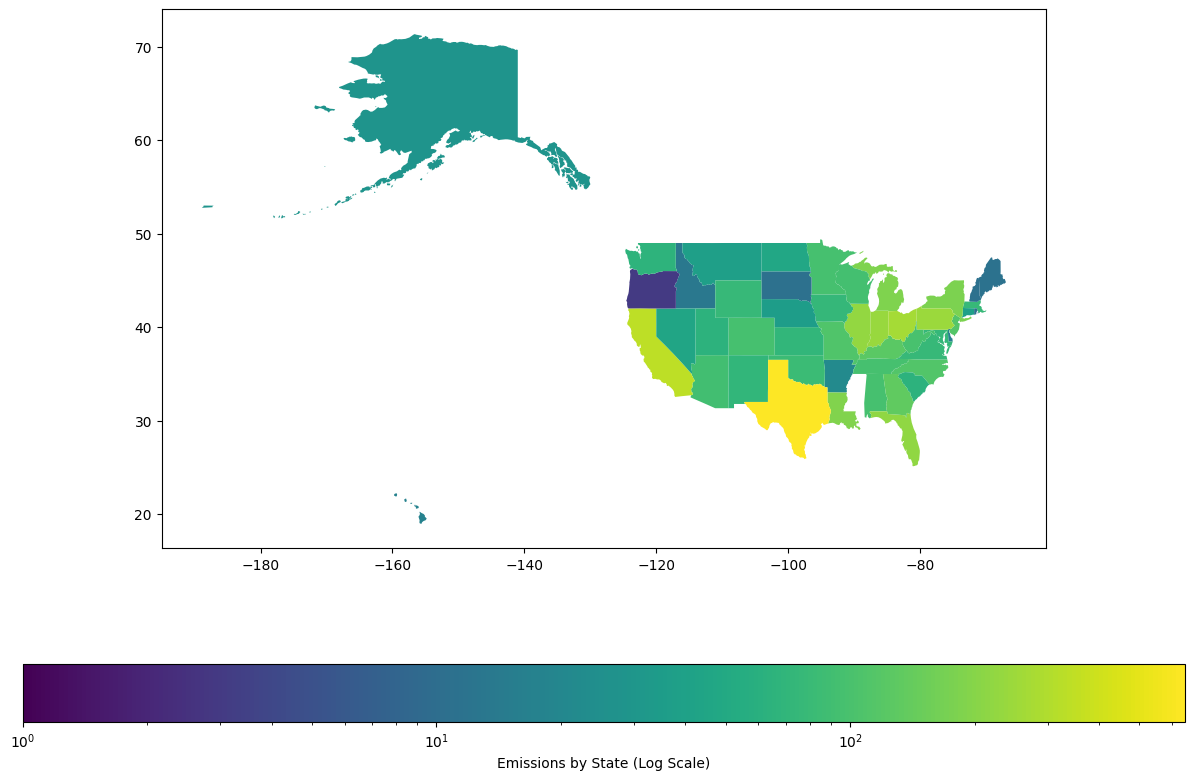

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Assuming emissions_df is your DataFrame after merging
column_to_visualize = 'Y2000'

# Apply a logarithmic normalization if your data spans several orders of magnitude
# This step is optional and depends on your data's nature
emissions_df[column_to_visualize] = emissions_df[column_to_visualize].apply(lambda x: max(x, 1))  # Avoid log(0)
norm = colors.LogNorm(vmin=emissions_df[column_to_visualize].min(), vmax=emissions_df[column_to_visualize].max())

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_df.plot(column=column_to_visualize, ax=ax, legend=True,
            norm=norm,  # Use logarithmic normalization
            cmap='viridis',  # A perceptually uniform colormap
            legend_kwds={'label': "Emissions by State (Log Scale)",
                         'orientation': "horizontal"})

plt.show()


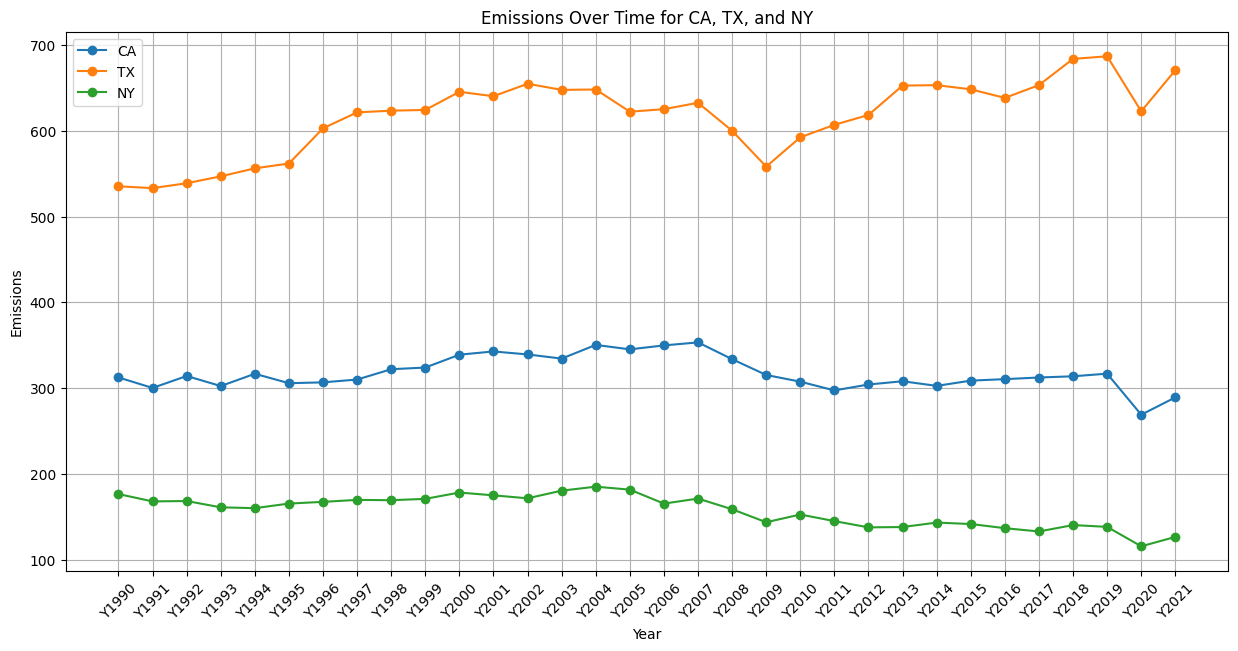

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load emissions data
emissions_df = pd.read_csv('/content/clean_state_emissions.csv')

# This time, ensure states_of_interest are exactly as they appear in your DataFrame
states_of_interest = ['CA', 'TX', 'NY']  # Update based on actual DataFrame content

# Initialize the plot
plt.figure(figsize=(15, 7))

# Iterate over the states of interest
for state in states_of_interest:
    # Filtering the DataFrame for the current state
    state_df = emissions_df[emissions_df['STATE'] == state]

    # Safety check: Only proceed if the state_df is not empty
    if not state_df.empty:
        # Extract years and emissions data
        years = state_df.columns[1:].tolist()  # Assuming the years start from the second column
        emissions = state_df.iloc[0, 1:].values  # Using the first row's emissions data

        # Plotting
        plt.plot(years, emissions, label=state, marker='o')
    else:
        print(f"No data found for {state}")

# Finalizing the plot
plt.title('Emissions Over Time for CA, TX, and NY')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


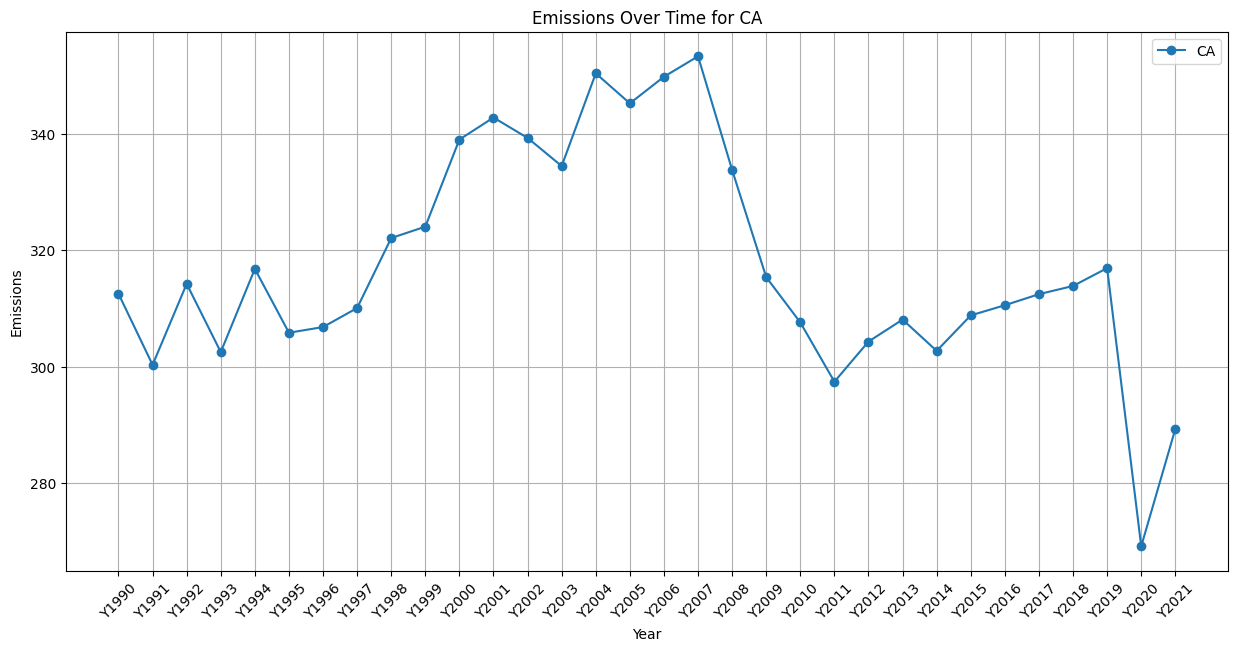

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load emissions data
emissions_df = pd.read_csv('/content/clean_state_emissions.csv')

# This time, ensure states_of_interest are exactly as they appear in your DataFrame
states_of_interest = ['CA']  # Update based on actual DataFrame content

# Initialize the plot
plt.figure(figsize=(15, 7))

# Iterate over the states of interest
for state in states_of_interest:
    # Filtering the DataFrame for the current state
    state_df = emissions_df[emissions_df['STATE'] == state]

    # Safety check: Only proceed if the state_df is not empty
    if not state_df.empty:
        # Extract years and emissions data
        years = state_df.columns[1:].tolist()  # Assuming the years start from the second column
        emissions = state_df.iloc[0, 1:].values  # Using the first row's emissions data

        # Plotting
        plt.plot(years, emissions, label=state, marker='o')
    else:
        print(f"No data found for {state}")

# Finalizing the plot
plt.title('Emissions Over Time for CA')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


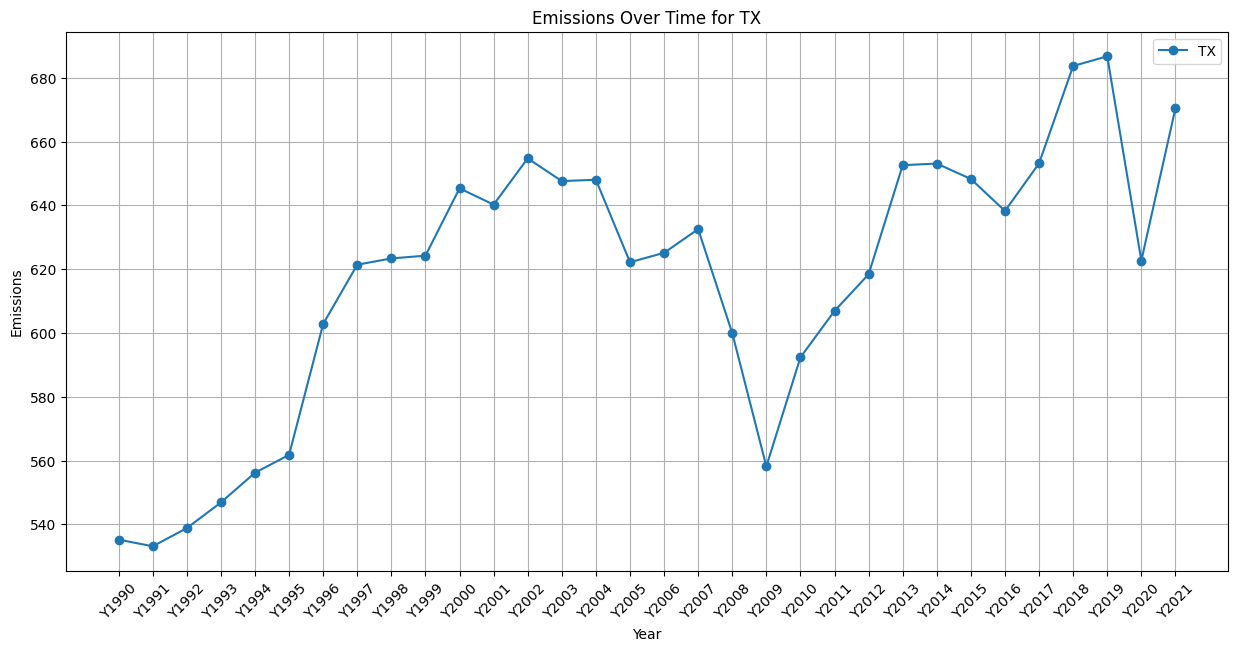

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load emissions data
emissions_df = pd.read_csv('/content/clean_state_emissions.csv')

# This time, ensure states_of_interest are exactly as they appear in your DataFrame
states_of_interest = ['TX']  # Update based on actual DataFrame content

# Initialize the plot
plt.figure(figsize=(15, 7))

# Iterate over the states of interest
for state in states_of_interest:
    # Filtering the DataFrame for the current state
    state_df = emissions_df[emissions_df['STATE'] == state]

    # Safety check: Only proceed if the state_df is not empty
    if not state_df.empty:
        # Extract years and emissions data
        years = state_df.columns[1:].tolist()  # Assuming the years start from the second column
        emissions = state_df.iloc[0, 1:].values  # Using the first row's emissions data

        # Plotting
        plt.plot(years, emissions, label=state, marker='o')
    else:
        print(f"No data found for {state}")

# Finalizing the plot
plt.title('Emissions Over Time for TX')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


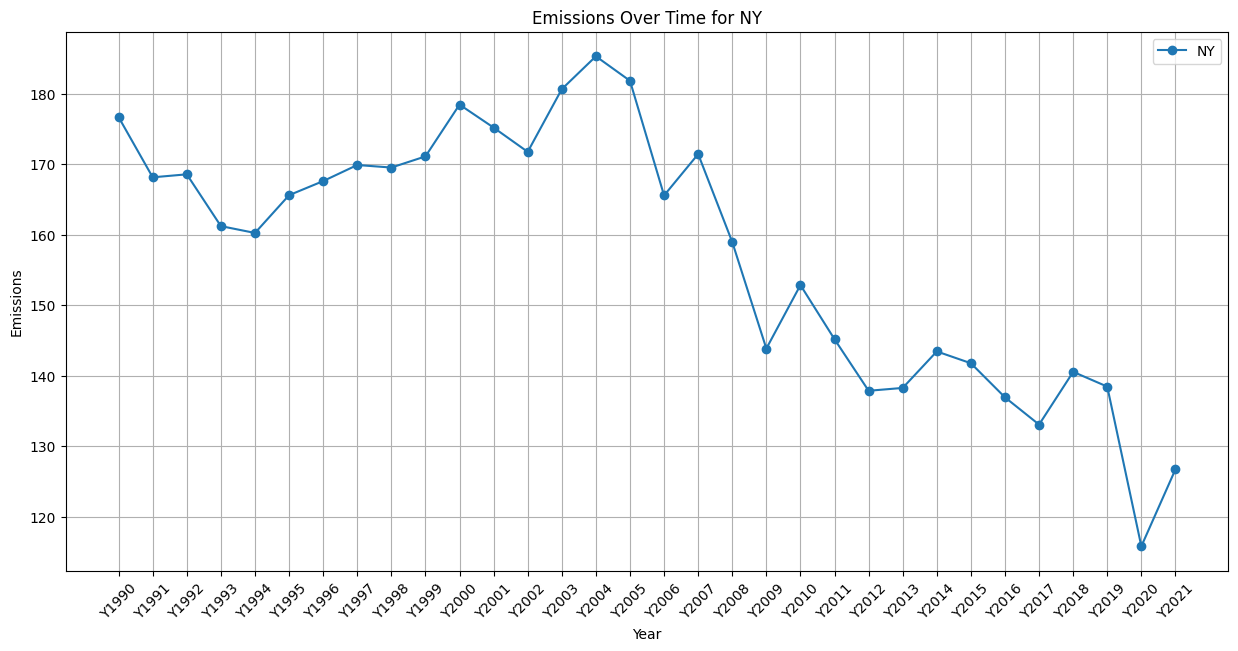

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load emissions data
emissions_df = pd.read_csv('/content/clean_state_emissions.csv')

# This time, ensure states_of_interest are exactly as they appear in your DataFrame
states_of_interest = ['NY']  # Update based on actual DataFrame content

# Initialize the plot
plt.figure(figsize=(15, 7))

# Iterate over the states of interest
for state in states_of_interest:
    # Filtering the DataFrame for the current state
    state_df = emissions_df[emissions_df['STATE'] == state]

    # Safety check: Only proceed if the state_df is not empty
    if not state_df.empty:
        # Extract years and emissions data
        years = state_df.columns[1:].tolist()  # Assuming the years start from the second column
        emissions = state_df.iloc[0, 1:].values  # Using the first row's emissions data

        # Plotting
        plt.plot(years, emissions, label=state, marker='o')
    else:
        print(f"No data found for {state}")

# Finalizing the plot
plt.title('Emissions Over Time for NY')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


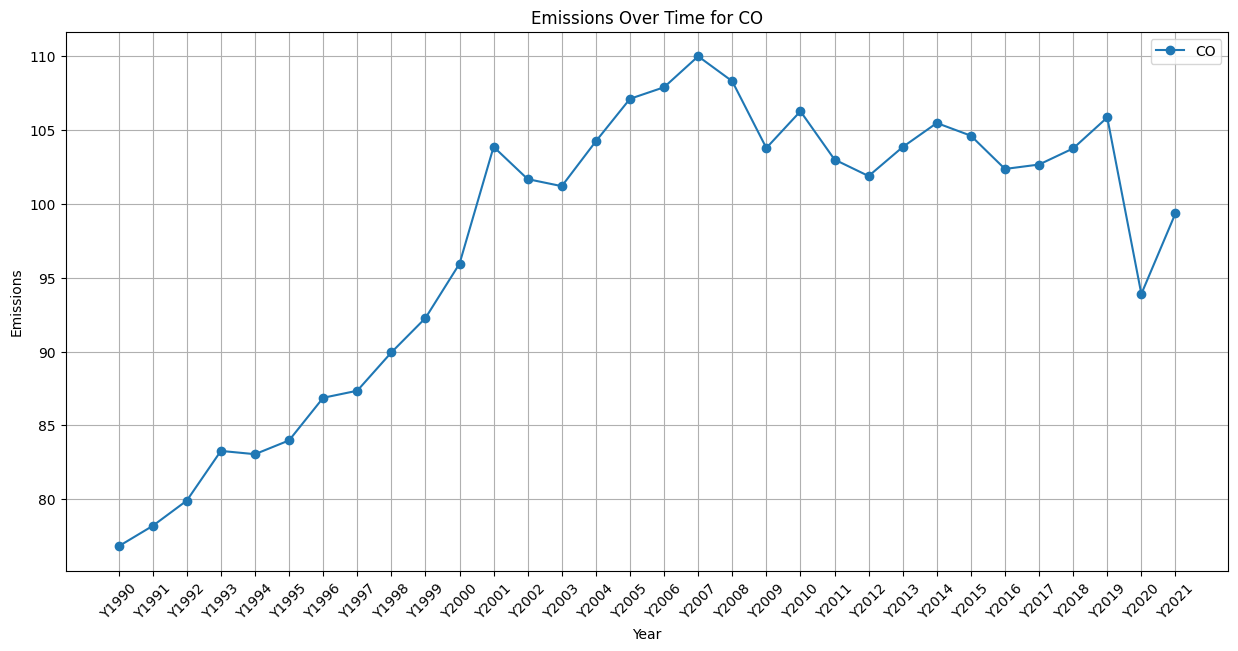

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load emissions data
emissions_df = pd.read_csv('/content/clean_state_emissions.csv')

# This time, ensure states_of_interest are exactly as they appear in your DataFrame
states_of_interest = ['CO']  # Update based on actual DataFrame content

# Initialize the plot
plt.figure(figsize=(15, 7))

# Iterate over the states of interest
for state in states_of_interest:
    # Filtering the DataFrame for the current state
    state_df = emissions_df[emissions_df['STATE'] == state]

    # Safety check: Only proceed if the state_df is not empty
    if not state_df.empty:
        # Extract years and emissions data
        years = state_df.columns[1:].tolist()  # Assuming the years start from the second column
        emissions = state_df.iloc[0, 1:].values  # Using the first row's emissions data

        # Plotting
        plt.plot(years, emissions, label=state, marker='o')
    else:
        print(f"No data found for {state}")

# Finalizing the plot
plt.title('Emissions Over Time for CO')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
